In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

import pathlib

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
data_dir = "gdrive/My Drive/vehicle_images"

In [4]:
start_training = time.time()

In [5]:
batch_size = 32
img_height = 180
img_width = 180

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

class_names = train_dataset.class_names
print(class_names)

Found 4333 files belonging to 4 classes.
Using 3467 files for training.
Found 4333 files belonging to 4 classes.
Using 866 files for validation.
['bus', 'motorcycle', 'plane', 'train']


(32, 180, 180, 3)
(32,)


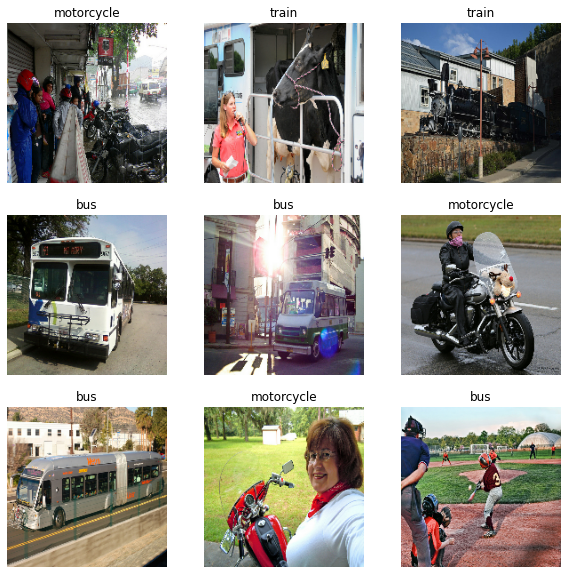

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size = AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]
## Notice the pixels values are now in '[0, 1]'
print(np.min(first_image), np.max(first_image))

num_classes = 4

0.0 1.0


In [8]:
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(256, activation = 'relu'),
                    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [9]:
epochs= 10
history = model.fit(train_dataset, validation_data = val_dataset, epochs=epochs)


accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10
109/109 [==============================] - 216s 2s/step - loss: 1.2453 - accuracy: 0.4104 - val_loss: 1.2033 - val_accuracy: 0.4711
Epoch 2/10
109/109 [==============================] - 141s 1s/step - loss: 1.0918 - accuracy: 0.5238 - val_loss: 1.0082 - val_accuracy: 0.5739
Epoch 3/10
109/109 [==============================] - 144s 1s/step - loss: 0.9934 - accuracy: 0.5855 - val_loss: 0.9735 - val_accuracy: 0.5831
Epoch 4/10
109/109 [==============================] - 140s 1s/step - loss: 0.9290 - accuracy: 0.6167 - val_loss: 0.9127 - val_accuracy: 0.6212
Epoch 5/10
109/109 [==============================] - 147s 1s/step - loss: 0.8448 - accuracy: 0.6669 - val_loss: 0.8738 - val_accuracy: 0.6513
Epoch 6/10
109/109 [==============================] - 141s 1s/step - loss: 0.8150 - accuracy: 0.6746 - val_loss: 0.9106 - val_accuracy: 0.6236
Epoch 7/10
109/109 [==============================] - 145s 1s/step - loss: 0.7509 - accuracy: 0.7093 - val_loss: 0.9034 - val_accuracy: 0.6490

In [10]:
end_training = time.time()

time_to_train = end_training - start_training
time_to_train

1979.502361536026

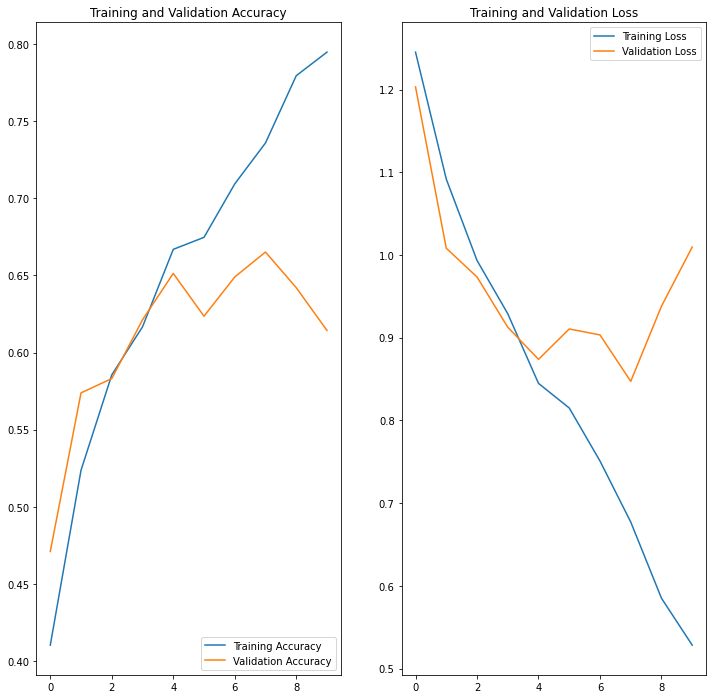

In [11]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

(32, 180, 180, 3)
(32,)


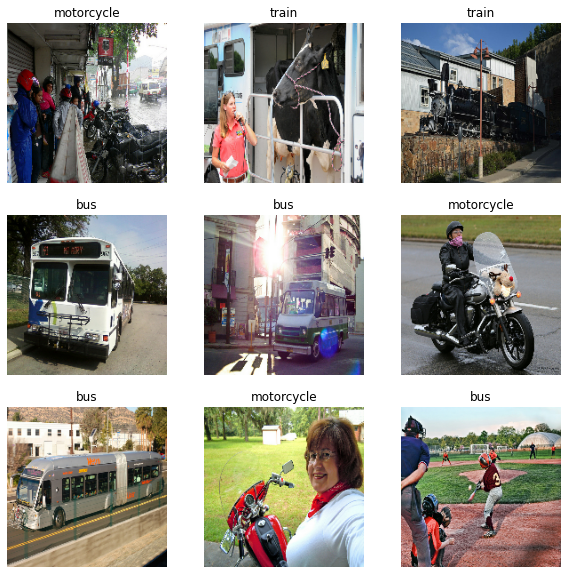

In [12]:
plt.figure(figsize=(10, 10))
for image, _ in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [13]:
new_data_dir = "gdrive/My Drive/vehicle_pictures"

batch_size = 32
img_height = 180
img_width = 180

new_data = tf.keras.preprocessing.image_dataset_from_directory(
  new_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = new_data.class_names
print(class_names)

Found 20 files belonging to 4 classes.
['Bus', 'Motorcycle', 'Plane', 'train']


(20, 180, 180, 3)
(20,)


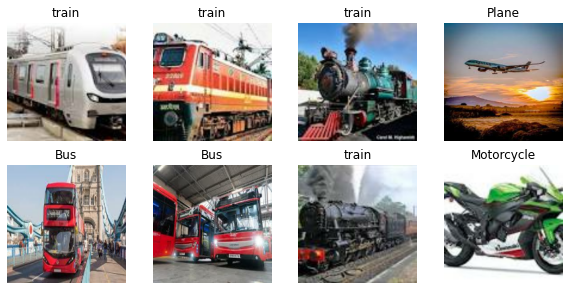

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in new_data.take(1):
  for i in range(8):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in new_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [16]:
loss, accuracy = model.evaluate(new_data)
print('Test Accuracy: ', accuracy)

1/1 [==============================] - 0s 291ms/step - loss: 1.5035 - accuracy: 0.5500
Test Accuracy:  0.550000011920929
